In [1]:
# IMPORTING MODULES:
import os
import pandas as pd
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# DOWNLOADING THE DATASET: UNCOMMENT BELOW:
# !wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
# !wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet

In [5]:
# READING THE DATASET:
df = pd.read_parquet("./fhv_tripdata_2021-01.parquet")      # Reading dataset.
df                                                          # Inspection.

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


- **Ans:** 1154112.

In [8]:
# PROCESSING THE DATASET:
df["duration"] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)
df.duration.mean()

19.1672240937939

**Ans:** 19.16

In [12]:
# INSPECTING THE DATAFRAME:
print("Before:", len(df))
df = df[(df.duration >= 1) & (df.duration <= 60)]
print("After:", len(df))

Before: 1154112
After: 1109826


In [9]:
# INSPECTING DATAFRAME:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [11]:
# PROCESSING THE DATASET:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)       # Conversion. 
df.dtypes                                           # Inspection.

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                      object
DOlocationID                      object
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [14]:
# INITIALIZING ONE HOT ENCODING:
train_dicts = df[categorical].to_dict(orient="records")                 # Initializing dictionary. 
dv = DictVectorizer()                                                   # Initializing dict vectorizer.
X_train = dv.fit_transform(train_dicts)                                 # Initializing one hot encoding.
target = "duration"
y_train = df[target].values                                             # Initialization.

In [15]:
# INSPECTION:
X_train.shape

(1109826, 525)

**Ans:** 525

In [16]:
# TRAINING LINEAR REGRESSION:
lr = LinearRegression()                                 # Initialization.
lr.fit(X_train, y_train)                                # Training the LR model.
y_pred = lr.predict(X_train)                            # Initializing prediction.
mean_squared_error(y_train, y_pred, squared=False)      # Inspecting MSE.

10.528519107212267

**Ans:** 10.52

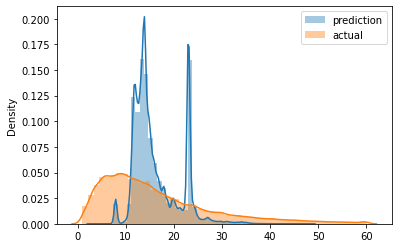

In [17]:
# VISUALIZATION OF PREDICTION:
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train, label="actual")
plt.legend();